### DTSC691 -Capstone 
### Using Machine Learning to Predict Coronary Heart Disease
#### Brandon Phillips

In [1]:
# standard imports
import numpy as np
import pandas as pd

#show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data
Food Access Research Atlas Data Download 2019 from USDA Economic Research Service. This dataset presents an overview of food access indicators for low-income and other census tracts using different measures of supermarket accessibility. The  data is divided by census tract. The data contains 147 columns and 72531 rows.
https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/


In [2]:
#Import "Food Access Research Atlas Data Download 2019"
food_2019 = pd.read_excel(r'C:\Users\14047\Desktop\Capstone\FoodAccessResearchAtlasData2019.xlsx',sheet_name="Food Access Research Atlas")
#View first five rows
food_2019.head()

CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  \
0                  0       0.0  0.000000                  0   
1                  0     181.0  8.341014                  1   
2                  0       0.0  0.000000                  0   
3                  0       0.0  0.000000                  0   
4                  0     181.0  1.681219                  0   

   LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  HUNVFlag  \
0                     0                  0                   0         0   
1                     1                  1                   0         0   
2                     0                  0                   0         0   
3                     0                  0                   0         0   
4                     0                  0                   0         1   

   LowIncomeTracts  PovertyRate  MedianFamilyIncome  LA1and10  LAhalfand10  \
0                0    11.336453             81250.0         1            1   
1                1    17.876788             49000.0         1            1   
2                0    15.046030             62609.0         1            1   
3                0     2.845210             70607.0         1            1   
4                0    15.150891             96334.0         1            1   

   LA1and20  LATracts_half  LATracts1  LATracts10  LATracts20  \
0         1              1          1           0           0   
1         1              1          1           0           0   
2         1              1          1           0           0   
3         1              1          1           0           0   
4         1              1          1           0           0   

   LATractsVehicle_20    LAPOP1_10   LAPOP05_10    LAPOP1_20  LALOWI1_10  \
0                   0  1896.493338  1912.000004  1896.493338  460.998748   
1                   0  1260.991651  2169.999998  1260.991651  603.892737   
2                   0  1551.703935  2856.859242  1551.703935  478.260886   
3                   0  1363.466885  3651.061015  1363.466885  343.215663   
4                   1  2643.095161  7778.396188  2643.095161  586.413137   

   LALOWI05_10  LALOWI1_20    lapophalf  lapophalfshare   lalowihalf  \
0   466.972228  460.998748  1912.000004      100.000000   466.972228   
1   962.199453  603.892737  2169.999998      100.000000   962.199453   
2   971.112475  478.260886  2856.859242       84.697873   971.112475   
3   893.201509  343.215663  3651.061015       83.243525   893.201509   
4  1718.885310  586.413137  7778.396188       72.249639  1718.885310   

   lalowihalfshare   lakidshalf  lakidshalfshare  laseniorshalf  \
0        24.423234   507.000002        26.516736     221.000002   
1        44.340989   606.000004        27.926267     214.000001   
2        28.790764   771.040463        22.859190     357.634554   
3        20.364831   846.613783        19.302640     766.521491   
4        15.965868  2309.475651        21.451567     839.885471   

   laseniorshalfshare  lawhitehalf  lawhitehalfshare  lablackhalf  \
0           11.558578  1622.000008         84.832636   216.999999   
1            9.861751   888.000003         40.921659  1216.999994   
2           10.602863  2176.590247         64.529803   554.235596   
3           17.476550  3395.061920         77.406793   170.065452   
4            7.801277  6298.710335         58.505576  1000.678496   

   lablackhalfshare  laasianhalf  laasianhalfshare  lanhopihalf  \
0         11.349372    14.000000          0.732218     0.000000   
1         56.082949     5.000000          0.230415     0

### Import 2nd Dataset
PLACES: Census Tract Data (GIS Friendly Format), 2021 release from the CDC. PLACES provides model-based, population-level analysis and community estimates of health measures to all counties, places (incorporated and census designated places), census tracts, and ZIP Code Tabulation Areas (ZCTAs) across the United States. The 2021 release is being used because it uses 2018 and 2019 data from Behavioral Risk Factor Surveillance System (BRFSS) which coincides with the year of the Food Access Research Atlas Data. BRFSS is a survey that collects data about health related conditions and behaviors. This data is limited in scope bece is is a survey of 348,000 people and does not measure the proportion os people with the respective diagnosis. Dataset has 72338 rows and 67 columns. https://data.cdc.gov/500-Cities-Places/PLACES-Census-Tract-Data-GIS-Friendly-Format-2021-/mb5y-ytti/about_data


In [3]:
# import "PLACES: Census Tract Data (GIS Friendly Format), 2021 release"
health = pd.read_csv('PLACES__Census_Tract_Data__GIS_Friendly_Format___2021_release_20240307.csv')
# View first five rows
health.head()

StateAbbr   StateDesc  CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AZ     Arizona    Maricopa        4013  4013422643             5789   
1        CA  California  Sacramento        6067  6067007402             6180   
2        AL     Alabama     Madison        1089  1089000201              760   
3        AL     Alabama  Montgomery        1101  1101002202             1185   
4        AL     Alabama      Butler        1013  1013952800             1394   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0               11.9      (10.1, 14.0)                 17.0   
1               15.4      (13.5, 17.3)                 24.6   
2               25.4      (21.2, 30.1)                 36.0   
3               25.2      (21.2, 29.4)                 36.1   
4               14.3      (11.9, 17.1)                 36.0   

  ARTHRITIS_Crude95CI  BINGE_CrudePrev BINGE_Crude95CI  BPHIGH_CrudePrev  \
0        (16.1, 17.9)             19.9    (19.2, 20.5)              23.7   
1        (23.8, 25.3)             19.6    (19.0, 20.1)              30.5   
2        (34.6, 37.3)             10.5    ( 9.8, 11.2)              53.7   
3        (35.0, 37.3)             10.9    (10.2, 11.6)              54.6   
4        (34.5, 37.4)             13.4    (12.8, 14.0)              43.0   

  BPHIGH_Crude95CI  BPMED_CrudePrev BPMED_Crude95CI  CANCER_CrudePrev  \
0     (22.7, 24.8)             63.0    (61.6, 64.3)               5.2   
1     (29.7, 31.3)             71.1    (70.1, 72.0)               6.8   
2     (52.3, 55.2)             80.4    (79.3, 81.5)               5.7   
3     (53.3, 55.8)             80.0    (78.9, 80.9)               5.9   
4     (41.5, 44.5)             80.4    (79.4, 81.3)               8.6   

  CANCER_Crude95CI  CASTHMA_CrudePrev CASTHMA_Crude95CI  CERVICAL_CrudePrev  \
0     ( 5.0,  5.4)                9.5      ( 9.1, 10.1)                86.9   
1     ( 6.5,  7.1)               11.2      (10.8, 11.8)                82.6   
2     ( 5.3,  6.0)               14.0      (13.0, 15.0)                82.5   
3     ( 5.6,  6.3)               12.5      (11.6, 13.5)                84.0   
4     ( 8.2,  9.1)                9.4      ( 8.9, 10.0)                87.2   

  CERVICAL_Crude95CI  CHD_CrudePrev CHD_Crude95CI  CHECKUP_CrudePrev  \
0       (85.2, 88.6)            3.3  ( 3.0,  3.6)               69.6   
1       (81.0, 84.6)            6.6  ( 6.1,  7.1)               69.4   
2       (80.1, 84.8)            9.3  ( 8.5, 10.3)               82.3   
3       (81.6, 86.2)            8.2  ( 7.5,  9.1)               83.8   
4       (85.0, 89.2)            7.7  ( 6.8,  8.5)               79.2   

  CHECKUP_Crude95CI  CHOLSCREEN_CrudePrev CHOLSCREEN_Crude95CI  \
0      (68.6, 70.5)                  85.0         (85.0, 85.1)   
1      (68.6, 70.1)                  84.0         (83.7, 84.2)   
2      (81.2, 83.3)                  87.6         (87.2, 87.9)   
3      (82.9, 84.7)                  89.3         (88.6, 90.0)   
4      (78.3, 80.1)                  90.0         (89.9, 90.1)   

   COLON_SCREEN_CrudePrev COLON_SCREEN_Crude95CI  COPD_CrudePrev  \
0                    65.6           (62.3, 68.5)             4.3   
1                    64.7           (61.6, 67.7)             7.7   
2                    60.0           (55.0, 64.4)            11.5   
3                    61.0           (56.1, 65.6)            10.8   
4                    68.8           (64.3, 72.2)             8.8   

  COPD_Crude95CI  COREM_CrudePrev COREM_Crude95CI  COREW_CrudePrev  \
0   ( 3.6,  5.0)             34.6    (27.9, 40.7)             28.7   
1   ( 7.0,  8.6)             24.5    (20.5, 29.2)             28.3   
2   ( 9.9, 13.1)             21.3    (16.8, 26.3)             22.4   
3   ( 9.5, 12.4)             22.6    (17.9, 27.6)             20.0   
4   ( 7.3, 10.4)             36.6    (28.8, 44.4)             30.5   

  COREW_Crude95CI  CSMOKING_CrudePrev CSMOKING_Crude95CI  DENTAL_CrudePrev  \
0    (24.1, 33.3)                

## Explore Data Analysis

Exploratory data analysis of Food Access Research Atlas Data Download 2019

In [4]:
#Check dimensions
food_2019.shape

(72531, 147)

In [5]:
#Check dtypes
food_2019.dtypes

CensusTract               int64
State                    object
County                   object
Urban                     int64
Pop2010                   int64
OHU2010                   int64
GroupQuartersFlag         int64
NUMGQTRS                float64
PCTGQTRS                float64
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LILATracts_Vehicle        int64
HUNVFlag                  int64
LowIncomeTracts           int64
PovertyRate             float64
MedianFamilyIncome      float64
LA1and10                  int64
LAhalfand10               int64
LA1and20                  int64
LATracts_half             int64
LATracts1                 int64
LATracts10                int64
LATracts20                int64
LATractsVehicle_20        int64
LAPOP1_10               float64
LAPOP05_10              float64
LAPOP1_20               float64
LALOWI1_10              float64
LALOWI05_10             float64
LALOWI1_20              float64
lapophal

In [6]:
#Summary Statistics
food_2019.describe()

CensusTract         Urban       Pop2010       OHU2010  \
count  7.253100e+04  72531.000000  72531.000000  72531.000000   
mean   2.782573e+10      0.760626   4256.739022   1609.191821   
std    1.581647e+10      0.426704   1955.987626    725.676046   
min    1.001020e+09      0.000000      1.000000      0.000000   
25%    1.212708e+10      1.000000   2899.000000   1108.000000   
50%    2.712979e+10      1.000000   4011.000000   1525.000000   
75%    4.103900e+10      1.000000   5330.500000   2021.000000   
max    5.604595e+10      1.000000  37452.000000  16043.000000   

       GroupQuartersFlag      NUMGQTRS      PCTGQTRS  LILATracts_1And10  \
count       72531.000000  72506.000000  72506.000000       72531.000000   
mean            0.007114    110.121549      2.708678           0.128125   
std             0.084046    443.931753      9.570881           0.334231   
min             0.000000      0.000000      0.000000           0.000000   
25%             0.000000      0.000000      0.000000           0.000000   
50%             0.000000      7.000000      0.181130           0.000000   
75%             0.000000     64.000000      1.565217           0.000000   
max             1.000000  19496.000000    100.000000           1.000000   

       LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  \
count          72531.000000       72531.000000        72531.000000   
mean               0.279150           0.112228            0.139609   
std                0.448584           0.315649            0.346584   
min                0.000000           0.000000            0.000000   
25%                0.000000           0.000000            0.000000   
50%                0.000000           0.000000            0.000000   
75%                1.000000           0.000000            0.000000   
max                1.000000           1.000000            1.000000   

           HUNVFlag  LowIncomeTracts   PovertyRate  MedianFamilyIncome  \
count  72531.000000     72531.000000  72528.000000        71783.000000   
mean       0.210820         0.417573     15.183628        77037.792249   
std        0.407894         0.493162     11.919764        37544.445885   
min        0.000000         0.000000      0.000000         2499.000000   
25%        0.000000         0.000000      6.495831        51484.000000   
50%        0.000000         0.000000     11.951363        68821.000000   
75%        0.000000         1.000000     20.597443        93868.500000   
max        1.000000         1.000000    100.000000       250001.000000   

           LA1and10   LAhalfand10      LA1and20  LATracts_half     LATracts1  \
count  72531.000000  72531.000000  72531.000000   72531.000000  72531.000000   
mean       0.379810      0.682756      0.340668       0.638830      0.335884   
std        0.485343      0.465406      0.473937       0.480343      0.472302   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000      0.000000       0.000000      0.000000   
50%        0.000000      1.000000      0.000000       1.000000      0.000000   
75%        1.000000      1.000000      1.000000       1.000000      1.000000   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

         LATracts10    LATracts20  LATractsVehicle_20     LAPOP1_10  \
count  72531.000000  72531.000000        72531.000000  42574.000000   
mean       0.043926      0.004784            0.214750   1611.579232   
std        0.204932      0.069002            0.410651   1778.311584   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.000000      0.000000            0.000000    223.295458   
50%        0.000000      0.000000            0.000000   1023.961627   
75%        0.000000      0.000000            0.000000   2455.880002   
max        1.000000      1.000000            1.000000  27226.505623   

         LAPOP05_10     LAPOP1_20    LALOWI1_10   LALOWI05_10    LALOWI1_20  \
count  5

In [7]:
#Check for missing values
food_2019.isnull().sum()

CensusTract                 0
State                       0
County                      0
Urban                       0
Pop2010                     0
OHU2010                     0
GroupQuartersFlag           0
NUMGQTRS                   25
PCTGQTRS                   25
LILATracts_1And10           0
LILATracts_halfAnd10        0
LILATracts_1And20           0
LILATracts_Vehicle          0
HUNVFlag                    0
LowIncomeTracts             0
PovertyRate                 3
MedianFamilyIncome        748
LA1and10                    0
LAhalfand10                 0
LA1and20                    0
LATracts_half               0
LATracts1                   0
LATracts10                  0
LATracts20                  0
LATractsVehicle_20          0
LAPOP1_10               29957
LAPOP05_10              14540
LAPOP1_20               35914
LALOWI1_10              29957
LALOWI05_10             14540
LALOWI1_20              35914
lapophalf                4568
lapophalfshare           4568
lalowihalf

In [8]:
#Create copy 
food_2 = food_2019.copy()

In [9]:
#Find percentage of values are null for each column
null_percentage = food_2.isnull().mean()*100
print(null_percentage)

CensusTract              0.000000
State                    0.000000
County                   0.000000
Urban                    0.000000
Pop2010                  0.000000
OHU2010                  0.000000
GroupQuartersFlag        0.000000
NUMGQTRS                 0.034468
PCTGQTRS                 0.034468
LILATracts_1And10        0.000000
LILATracts_halfAnd10     0.000000
LILATracts_1And20        0.000000
LILATracts_Vehicle       0.000000
HUNVFlag                 0.000000
LowIncomeTracts          0.000000
PovertyRate              0.004136
MedianFamilyIncome       1.031283
LA1and10                 0.000000
LAhalfand10              0.000000
LA1and20                 0.000000
LATracts_half            0.000000
LATracts1                0.000000
LATracts10               0.000000
LATracts20               0.000000
LATractsVehicle_20       0.000000
LAPOP1_10               41.302340
LAPOP05_10              20.046601
LAPOP1_20               49.515380
LALOWI1_10              41.302340
LALOWI05_10   

Drop columns with large percentage of null values

In [10]:
# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()

food_2 = food_2.drop(col_to_drop, axis=1)

In [11]:
#Review shape 
food_2.shape

(72531, 95)

52 columns that have greater than 60% null values dropped.

Exploratory analysis of PLACES: Census Tract Data (GIS Friendly Format), 2021 release

In [12]:
#Make copy of dataset
health_2 = health.copy()

In [13]:
health_2.shape

(72337, 67)

In [14]:
#Check dtypes
health_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72337 entries, 0 to 72336
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               72337 non-null  object 
 1   StateDesc               72337 non-null  object 
 2   CountyName              72337 non-null  object 
 3   CountyFIPS              72337 non-null  int64  
 4   TractFIPS               72337 non-null  int64  
 5   TotalPopulation         72337 non-null  int64  
 6   ACCESS2_CrudePrev       70338 non-null  float64
 7   ACCESS2_Crude95CI       70338 non-null  object 
 8   ARTHRITIS_CrudePrev     70338 non-null  float64
 9   ARTHRITIS_Crude95CI     70338 non-null  object 
 10  BINGE_CrudePrev         70338 non-null  float64
 11  BINGE_Crude95CI         70338 non-null  object 
 12  BPHIGH_CrudePrev        70338 non-null  float64
 13  BPHIGH_Crude95CI        70338 non-null  object 
 14  BPMED_CrudePrev         70338 non-null

In [15]:
#Summary Statistics
health_2.describe()

CountyFIPS     TractFIPS  TotalPopulation  ACCESS2_CrudePrev  \
count  72337.000000  7.233700e+04     72337.000000       70338.000000   
mean   27822.567220  2.782282e+10      4268.122372          16.308384   
std    15818.157161  1.581816e+10      1946.201658           8.354562   
min     1001.000000  1.001020e+09        56.000000           3.300000   
25%    12127.000000  1.212708e+10      2909.000000          10.400000   
50%    27127.000000  2.712775e+10      4018.000000          14.100000   
75%    41035.000000  4.103597e+10      5335.000000          20.100000   
max    56045.000000  5.604595e+10     37452.000000          66.800000   

       ARTHRITIS_CrudePrev  BINGE_CrudePrev  BPHIGH_CrudePrev  \
count         70338.000000     70338.000000      70338.000000   
mean             24.992009        17.612611         32.491583   
std               6.349013         3.452931          7.361845   
min               2.500000         2.800000          5.100000   
25%              20.500000        15.400000         27.600000   
50%              25.100000        17.500000         31.900000   
75%              29.400000        19.700000         36.800000   
max              53.900000        42.200000         72.300000   

       BPMED_CrudePrev  CANCER_CrudePrev  CASTHMA_CrudePrev  \
count     70338.000000      70338.000000       70338.000000   
mean         72.792253          6.733773           9.766664   
std           7.183087          1.937511           1.559849   
min           9.400000          0.500000           4.900000   
25%          69.600000          5.400000           8.700000   
50%          74.200000          6.800000           9.600000   
75%          77.400000          7.900000          10.600000   
max          92.800000         20.900000          21.500000   

       CERVICAL_CrudePrev  CHD_CrudePrev  CHECKUP_CrudePrev  \
count        72320.000000   70338.000000       70338.000000   
mean            83.788666       6.115448          75.655597   
std              4.169403       2.059084           4.936496   
min             43.200000       0.300000          50.700000   
25%             81.700000       4.700000          72.400000   
50%             84.300000       5.900000          76.400000   
75%             86.500000       7.400000          79.200000   
max             92.700000      37.100000          93.000000   

       CHOLSCREEN_CrudePrev  COLON_SCREEN_CrudePrev  COPD_CrudePrev  \
count          70338.000000            72304.000000    70338.000000   
mean              85.577477               63.706926        7.187765   
std                4.415340                7.020426        2.705892   
min               48.000000               27.700000        1.000000   
25%               83.400000               59.600000        5.200000   
50%               86.100000               64.600000        6.800000   
75%               88.500000               68.800000        8.800000   
max               98.200000               83.700000       28.400000   

       COREM_CrudePrev  COREW_CrudePrev  CSMOKING_CrudePrev  DENTAL_CrudePrev  \
count     72193.000000     72142.000000        70338.000000      72337.000000   
mean         31.491127        28.046267           17.978686         63.433102   
std           6.966484         6.085977            5.764506         11.046979   
min           9.800000         7.400000            3.200000         19.000000   
25%          26.700000        23.800000           13.700000         55.900000   
50%          31.800000        28.000000           17.600000         64.800000   
75%          36.400000        32.200000           21.700000         72.000000   
max          56.100000        55.100000           52.100000         88.100000   

       DEPRESSION_CrudePrev  DIABETES_CrudePrev  GHLTH_CrudePrev  \
count          70338.000000        70338.000000     70338.000000   
mean              20.623548           10.963034        19.990034   
std                3.645453            3.727308        

In [16]:
#Find percentage of values are null for each column
null_percentage = health_2.isnull().mean()*100
print(null_percentage)

StateAbbr                 0.000000
StateDesc                 0.000000
CountyName                0.000000
CountyFIPS                0.000000
TractFIPS                 0.000000
TotalPopulation           0.000000
ACCESS2_CrudePrev         2.763454
ACCESS2_Crude95CI         2.763454
ARTHRITIS_CrudePrev       2.763454
ARTHRITIS_Crude95CI       2.763454
BINGE_CrudePrev           2.763454
BINGE_Crude95CI           2.763454
BPHIGH_CrudePrev          2.763454
BPHIGH_Crude95CI          2.763454
BPMED_CrudePrev           2.763454
BPMED_Crude95CI           2.763454
CANCER_CrudePrev          2.763454
CANCER_Crude95CI          2.763454
CASTHMA_CrudePrev         2.763454
CASTHMA_Crude95CI         2.763454
CERVICAL_CrudePrev        0.023501
CERVICAL_Crude95CI        0.023501
CHD_CrudePrev             2.763454
CHD_Crude95CI             2.763454
CHECKUP_CrudePrev         2.763454
CHECKUP_Crude95CI         2.763454
CHOLSCREEN_CrudePrev      2.763454
CHOLSCREEN_Crude95CI      2.763454
COLON_SCREEN_CrudePr

All columns have less than 3% of data missing. Missing values will be imputed.

### Join tables and reduce features

In [17]:
health_2.head()

StateAbbr   StateDesc  CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AZ     Arizona    Maricopa        4013  4013422643             5789   
1        CA  California  Sacramento        6067  6067007402             6180   
2        AL     Alabama     Madison        1089  1089000201              760   
3        AL     Alabama  Montgomery        1101  1101002202             1185   
4        AL     Alabama      Butler        1013  1013952800             1394   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0               11.9      (10.1, 14.0)                 17.0   
1               15.4      (13.5, 17.3)                 24.6   
2               25.4      (21.2, 30.1)                 36.0   
3               25.2      (21.2, 29.4)                 36.1   
4               14.3      (11.9, 17.1)                 36.0   

  ARTHRITIS_Crude95CI  BINGE_CrudePrev BINGE_Crude95CI  BPHIGH_CrudePrev  \
0        (16.1, 17.9)             19.9    (19.2, 20.5)              23.7   
1        (23.8, 25.3)             19.6    (19.0, 20.1)              30.5   
2        (34.6, 37.3)             10.5    ( 9.8, 11.2)              53.7   
3        (35.0, 37.3)             10.9    (10.2, 11.6)              54.6   
4        (34.5, 37.4)             13.4    (12.8, 14.0)              43.0   

  BPHIGH_Crude95CI  BPMED_CrudePrev BPMED_Crude95CI  CANCER_CrudePrev  \
0     (22.7, 24.8)             63.0    (61.6, 64.3)               5.2   
1     (29.7, 31.3)             71.1    (70.1, 72.0)               6.8   
2     (52.3, 55.2)             80.4    (79.3, 81.5)               5.7   
3     (53.3, 55.8)             80.0    (78.9, 80.9)               5.9   
4     (41.5, 44.5)             80.4    (79.4, 81.3)               8.6   

  CANCER_Crude95CI  CASTHMA_CrudePrev CASTHMA_Crude95CI  CERVICAL_CrudePrev  \
0     ( 5.0,  5.4)                9.5      ( 9.1, 10.1)                86.9   
1     ( 6.5,  7.1)               11.2      (10.8, 11.8)                82.6   
2     ( 5.3,  6.0)               14.0      (13.0, 15.0)                82.5   
3     ( 5.6,  6.3)               12.5      (11.6, 13.5)                84.0   
4     ( 8.2,  9.1)                9.4      ( 8.9, 10.0)                87.2   

  CERVICAL_Crude95CI  CHD_CrudePrev CHD_Crude95CI  CHECKUP_CrudePrev  \
0       (85.2, 88.6)            3.3  ( 3.0,  3.6)               69.6   
1       (81.0, 84.6)            6.6  ( 6.1,  7.1)               69.4   
2       (80.1, 84.8)            9.3  ( 8.5, 10.3)               82.3   
3       (81.6, 86.2)            8.2  ( 7.5,  9.1)               83.8   
4       (85.0, 89.2)            7.7  ( 6.8,  8.5)               79.2   

  CHECKUP_Crude95CI  CHOLSCREEN_CrudePrev CHOLSCREEN_Crude95CI  \
0      (68.6, 70.5)                  85.0         (85.0, 85.1)   
1      (68.6, 70.1)                  84.0         (83.7, 84.2)   
2      (81.2, 83.3)                  87.6         (87.2, 87.9)   
3      (82.9, 84.7)                  89.3         (88.6, 90.0)   
4      (78.3, 80.1)                  90.0         (89.9, 90.1)   

   COLON_SCREEN_CrudePrev COLON_SCREEN_Crude95CI  COPD_CrudePrev  \
0                    65.6           (62.3, 68.5)             4.3   
1                    64.7           (61.6, 67.7)             7.7   
2                    60.0           (55.0, 64.4)            11.5   
3                    61.0           (56.1, 65.6)            10.8   
4                    68.8           (64.3, 72.2)             8.8   

  COPD_Crude95CI  COREM_CrudePrev COREM_Crude95CI  COREW_CrudePrev  \
0   ( 3.6,  5.0)             34.6    (27.9, 40.7)             28.7   
1   ( 7.0,  8.6)             24.5    (20.5, 29.2)             28.3   
2   ( 9.9, 13.1)             21.3    (16.8, 26.3)             22.4   
3   ( 9.5, 12.4)             22.6    (17.9, 27.6)             20.0   
4   ( 7.3, 10.4)             36.6    (28.8, 44.4)             30.5   

  COREW_Crude95CI  CSMOKING_CrudePrev CSMOKING_Crude95CI  DENTAL_CrudePrev  \
0    (24.1, 33.3)                

In [18]:
# Join both dataframes on census tract data
joined_df = pd.merge(food_2, health_2, how='inner', left_on='CensusTract', right_on='TractFIPS')

# View new shape
joined_df.shape

(72335, 162)

In [19]:
# View head
joined_df.head()

CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  \
0                  0       0.0  0.000000                  0   
1                  0     181.0  8.341014                  1   
2                  0       0.0  0.000000                  0   
3                  0       0.0  0.000000                  0   
4                  0     181.0  1.681219                  0   

   LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  HUNVFlag  \
0                     0                  0                   0         0   
1                     1                  1                   0         0   
2                     0                  0                   0         0   
3                     0                  0                   0         0   
4                     0                  0                   0         1   

   LowIncomeTracts  PovertyRate  MedianFamilyIncome  LA1and10  LAhalfand10  \
0                0    11.336453             81250.0         1            1   
1                1    17.876788             49000.0         1            1   
2                0    15.046030             62609.0         1            1   
3                0     2.845210             70607.0         1            1   
4                0    15.150891             96334.0         1            1   

   LA1and20  LATracts_half  LATracts1  LATracts10  LATracts20  \
0         1              1          1           0           0   
1         1              1          1           0           0   
2         1              1          1           0           0   
3         1              1          1           0           0   
4         1              1          1           0           0   

   LATractsVehicle_20    LAPOP1_10   LAPOP05_10    LAPOP1_20  LALOWI1_10  \
0                   0  1896.493338  1912.000004  1896.493338  460.998748   
1                   0  1260.991651  2169.999998  1260.991651  603.892737   
2                   0  1551.703935  2856.859242  1551.703935  478.260886   
3                   0  1363.466885  3651.061015  1363.466885  343.215663   
4                   1  2643.095161  7778.396188  2643.095161  586.413137   

   LALOWI05_10  LALOWI1_20    lapophalf  lapophalfshare   lalowihalf  \
0   466.972228  460.998748  1912.000004      100.000000   466.972228   
1   962.199453  603.892737  2169.999998      100.000000   962.199453   
2   971.112475  478.260886  2856.859242       84.697873   971.112475   
3   893.201509  343.215663  3651.061015       83.243525   893.201509   
4  1718.885310  586.413137  7778.396188       72.249639  1718.885310   

   lalowihalfshare   lakidshalf  lakidshalfshare  laseniorshalf  \
0        24.423234   507.000002        26.516736     221.000002   
1        44.340989   606.000004        27.926267     214.000001   
2        28.790764   771.040463        22.859190     357.634554   
3        20.364831   846.613783        19.302640     766.521491   
4        15.965868  2309.475651        21.451567     839.885471   

   laseniorshalfshare  lawhitehalf  lawhitehalfshare  lablackhalf  \
0           11.558578  1622.000008         84.832636   216.999999   
1            9.861751   888.000003         40.921659  1216.999994   
2           10.602863  2176.590247         64.529803   554.235596   
3           17.476550  3395.061920         77.406793   170.065452   
4            7.801277  6298.710335         58.505576  1000.678496   

   lablackhalfshare  laasianhalf  laasianhalfshare  lanhopihalf  \
0         11.349372    14.000000          0.732218     0.000000   
1         56.082949     5.000000          0.230415     0

In [20]:

# Drop redundant state, county, census tract
joined_df=joined_df.drop(columns=['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TractFIPS', 'TotalPopulation', 'Geolocation'], axis =1)

In [21]:
# Combine state and county and drop original state and county
joined_df['StateCounty'] =joined_df['State'] +', '+ joined_df['County']
joined_df=joined_df.drop(columns=['State','County'], axis =1)

In [22]:
joined_df.head()

CensusTract  Urban  Pop2010  OHU2010  GroupQuartersFlag  NUMGQTRS  \
0   1001020100      1     1912      693                  0       0.0   
1   1001020200      1     2170      743                  0     181.0   
2   1001020300      1     3373     1256                  0       0.0   
3   1001020400      1     4386     1722                  0       0.0   
4   1001020500      1    10766     4082                  0     181.0   

   PCTGQTRS  LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
0  0.000000                  0                     0                  0   
1  8.341014                  1                     1                  1   
2  0.000000                  0                     0                  0   
3  0.000000                  0                     0                  0   
4  1.681219                  0                     0                  0   

   LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  PovertyRate  \
0                   0         0                0    11.336453   
1                   0         0                1    17.876788   
2                   0         0                0    15.046030   
3                   0         0                0     2.845210   
4                   0         1                0    15.150891   

   MedianFamilyIncome  LA1and10  LAhalfand10  LA1and20  LATracts_half  \
0             81250.0         1            1         1              1   
1             49000.0         1            1         1              1   
2             62609.0         1            1         1              1   
3             70607.0         1            1         1              1   
4             96334.0         1            1         1              1   

   LATracts1  LATracts10  LATracts20  LATractsVehicle_20    LAPOP1_10  \
0          1           0           0                   0  1896.493338   
1          1           0           0                   0  1260.991651   
2          1           0           0                   0  1551.703935   
3          1           0           0                   0  1363.466885   
4          1           0           0                   1  2643.095161   

    LAPOP05_10    LAPOP1_20  LALOWI1_10  LALOWI05_10  LALOWI1_20    lapophalf  \
0  1912.000004  1896.493338  460.998748   466.972228  460.998748  1912.000004   
1  2169.999998  1260.991651  603.892737   962.199453  603.892737  2169.999998   
2  2856.859242  1551.703935  478.260886   971.112475  478.260886  2856.859242   
3  3651.061015  1363.466885  343.215663   893.201509  343.215663  3651.061015   
4  7778.396188  2643.095161  586.413137  1718.885310  586.413137  7778.396188   

   lapophalfshare   lalowihalf  lalowihalfshare   lakidshalf  lakidshalfshare  \
0      100.000000   466.972228        24.423234   507.000002        26.516736   
1      100.000000   962.199453        44.340989   606.000004        27.926267   
2       84.697873   971.112475        28.790764   771.040463        22.859190   
3       83.243525   893.201509        20.364831   846.613783        19.302640   
4       72.249639  1718.885310        15.965868  2309.475651        21.451567   

   laseniorshalf  laseniorshalfshare  lawhitehalf  lawhitehalfshare  \
0     221.000002           11.558578  1622.000008         84.832636   
1     214.000001            9.861751   888.000003         40.921659   
2     357.634554           10.602863  2176.590247         64.529803   
3     766.521491           17.476550  3395.061920         77.406793   
4     839.885471            7.801277  6298.710335         58.505576   

   lablackhalf  lablackhalfshare  laasianhalf  laasianhalfshare  lanhopihalf  \
0   216.999999         11.349372    14.000000          0.732218     0.000000   
1  1216.999994         56.082949     5.000000          0.230415     0.000000   
2   554.235596         16.431533    10.268051          0.304419     1.000000   
3   170.065452          3.877461    14.874754          0.339142     2.638384   
4  1000.678496          9.294803   208.982771    

In [23]:
joined_df.shape

(72335, 154)

Drop columns of health conditions that are not related to coronary heart disease

In [24]:
# Drop 95% CI

# List columns containing 95CI because it is categorical
columns_to_drop = joined_df.columns[joined_df.columns.str.contains('95CI')]


# Drop columns containing the specified string
joined_df.drop(columns=columns_to_drop, axis = 1, inplace=True)





In [25]:
# List all columns that contain '_CrudePrev' except 'CHD_CrudePrev' which will be the target
cols_to_remove = [col for col in joined_df.columns if '_CrudePrev' in col and col != 'CHD_CrudePrev']

# Drop the columns
joined_df.drop(columns=cols_to_remove, inplace=True)

joined_df.head()

CensusTract  Urban  Pop2010  OHU2010  GroupQuartersFlag  NUMGQTRS  \
0   1001020100      1     1912      693                  0       0.0   
1   1001020200      1     2170      743                  0     181.0   
2   1001020300      1     3373     1256                  0       0.0   
3   1001020400      1     4386     1722                  0       0.0   
4   1001020500      1    10766     4082                  0     181.0   

   PCTGQTRS  LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
0  0.000000                  0                     0                  0   
1  8.341014                  1                     1                  1   
2  0.000000                  0                     0                  0   
3  0.000000                  0                     0                  0   
4  1.681219                  0                     0                  0   

   LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  PovertyRate  \
0                   0         0                0    11.336453   
1                   0         0                1    17.876788   
2                   0         0                0    15.046030   
3                   0         0                0     2.845210   
4                   0         1                0    15.150891   

   MedianFamilyIncome  LA1and10  LAhalfand10  LA1and20  LATracts_half  \
0             81250.0         1            1         1              1   
1             49000.0         1            1         1              1   
2             62609.0         1            1         1              1   
3             70607.0         1            1         1              1   
4             96334.0         1            1         1              1   

   LATracts1  LATracts10  LATracts20  LATractsVehicle_20    LAPOP1_10  \
0          1           0           0                   0  1896.493338   
1          1           0           0                   0  1260.991651   
2          1           0           0                   0  1551.703935   
3          1           0           0                   0  1363.466885   
4          1           0           0                   1  2643.095161   

    LAPOP05_10    LAPOP1_20  LALOWI1_10  LALOWI05_10  LALOWI1_20    lapophalf  \
0  1912.000004  1896.493338  460.998748   466.972228  460.998748  1912.000004   
1  2169.999998  1260.991651  603.892737   962.199453  603.892737  2169.999998   
2  2856.859242  1551.703935  478.260886   971.112475  478.260886  2856.859242   
3  3651.061015  1363.466885  343.215663   893.201509  343.215663  3651.061015   
4  7778.396188  2643.095161  586.413137  1718.885310  586.413137  7778.396188   

   lapophalfshare   lalowihalf  lalowihalfshare   lakidshalf  lakidshalfshare  \
0      100.000000   466.972228        24.423234   507.000002        26.516736   
1      100.000000   962.199453        44.340989   606.000004        27.926267   
2       84.697873   971.112475        28.790764   771.040463        22.859190   
3       83.243525   893.201509        20.364831   846.613783        19.302640   
4       72.249639  1718.885310        15.965868  2309.475651        21.451567   

   laseniorshalf  laseniorshalfshare  lawhitehalf  lawhitehalfshare  \
0     221.000002           11.558578  1622.000008         84.832636   
1     214.000001            9.861751   888.000003         40.921659   
2     357.634554           10.602863  2176.590247         64.529803   
3     766.521491           17.476550  3395.061920         77.406793   
4     839.885471            7.801277  6298.710335         58.505576   

   lablackhalf  lablackhalfshare  laasianhalf  laasianhalfshare  lanhopihalf  \
0   216.999999         11.349372    14.000000          0.732218     0.000000   
1  1216.999994         56.082949     5.000000          0.230415     0.000000   
2   554.235596         16.431533    10.268051          0.304419     1.000000   
3   170.065452          3.877461    14.874754          0.339142     2.638384   
4  1000.678496          9.294803   208.982771    

### Exploratory views

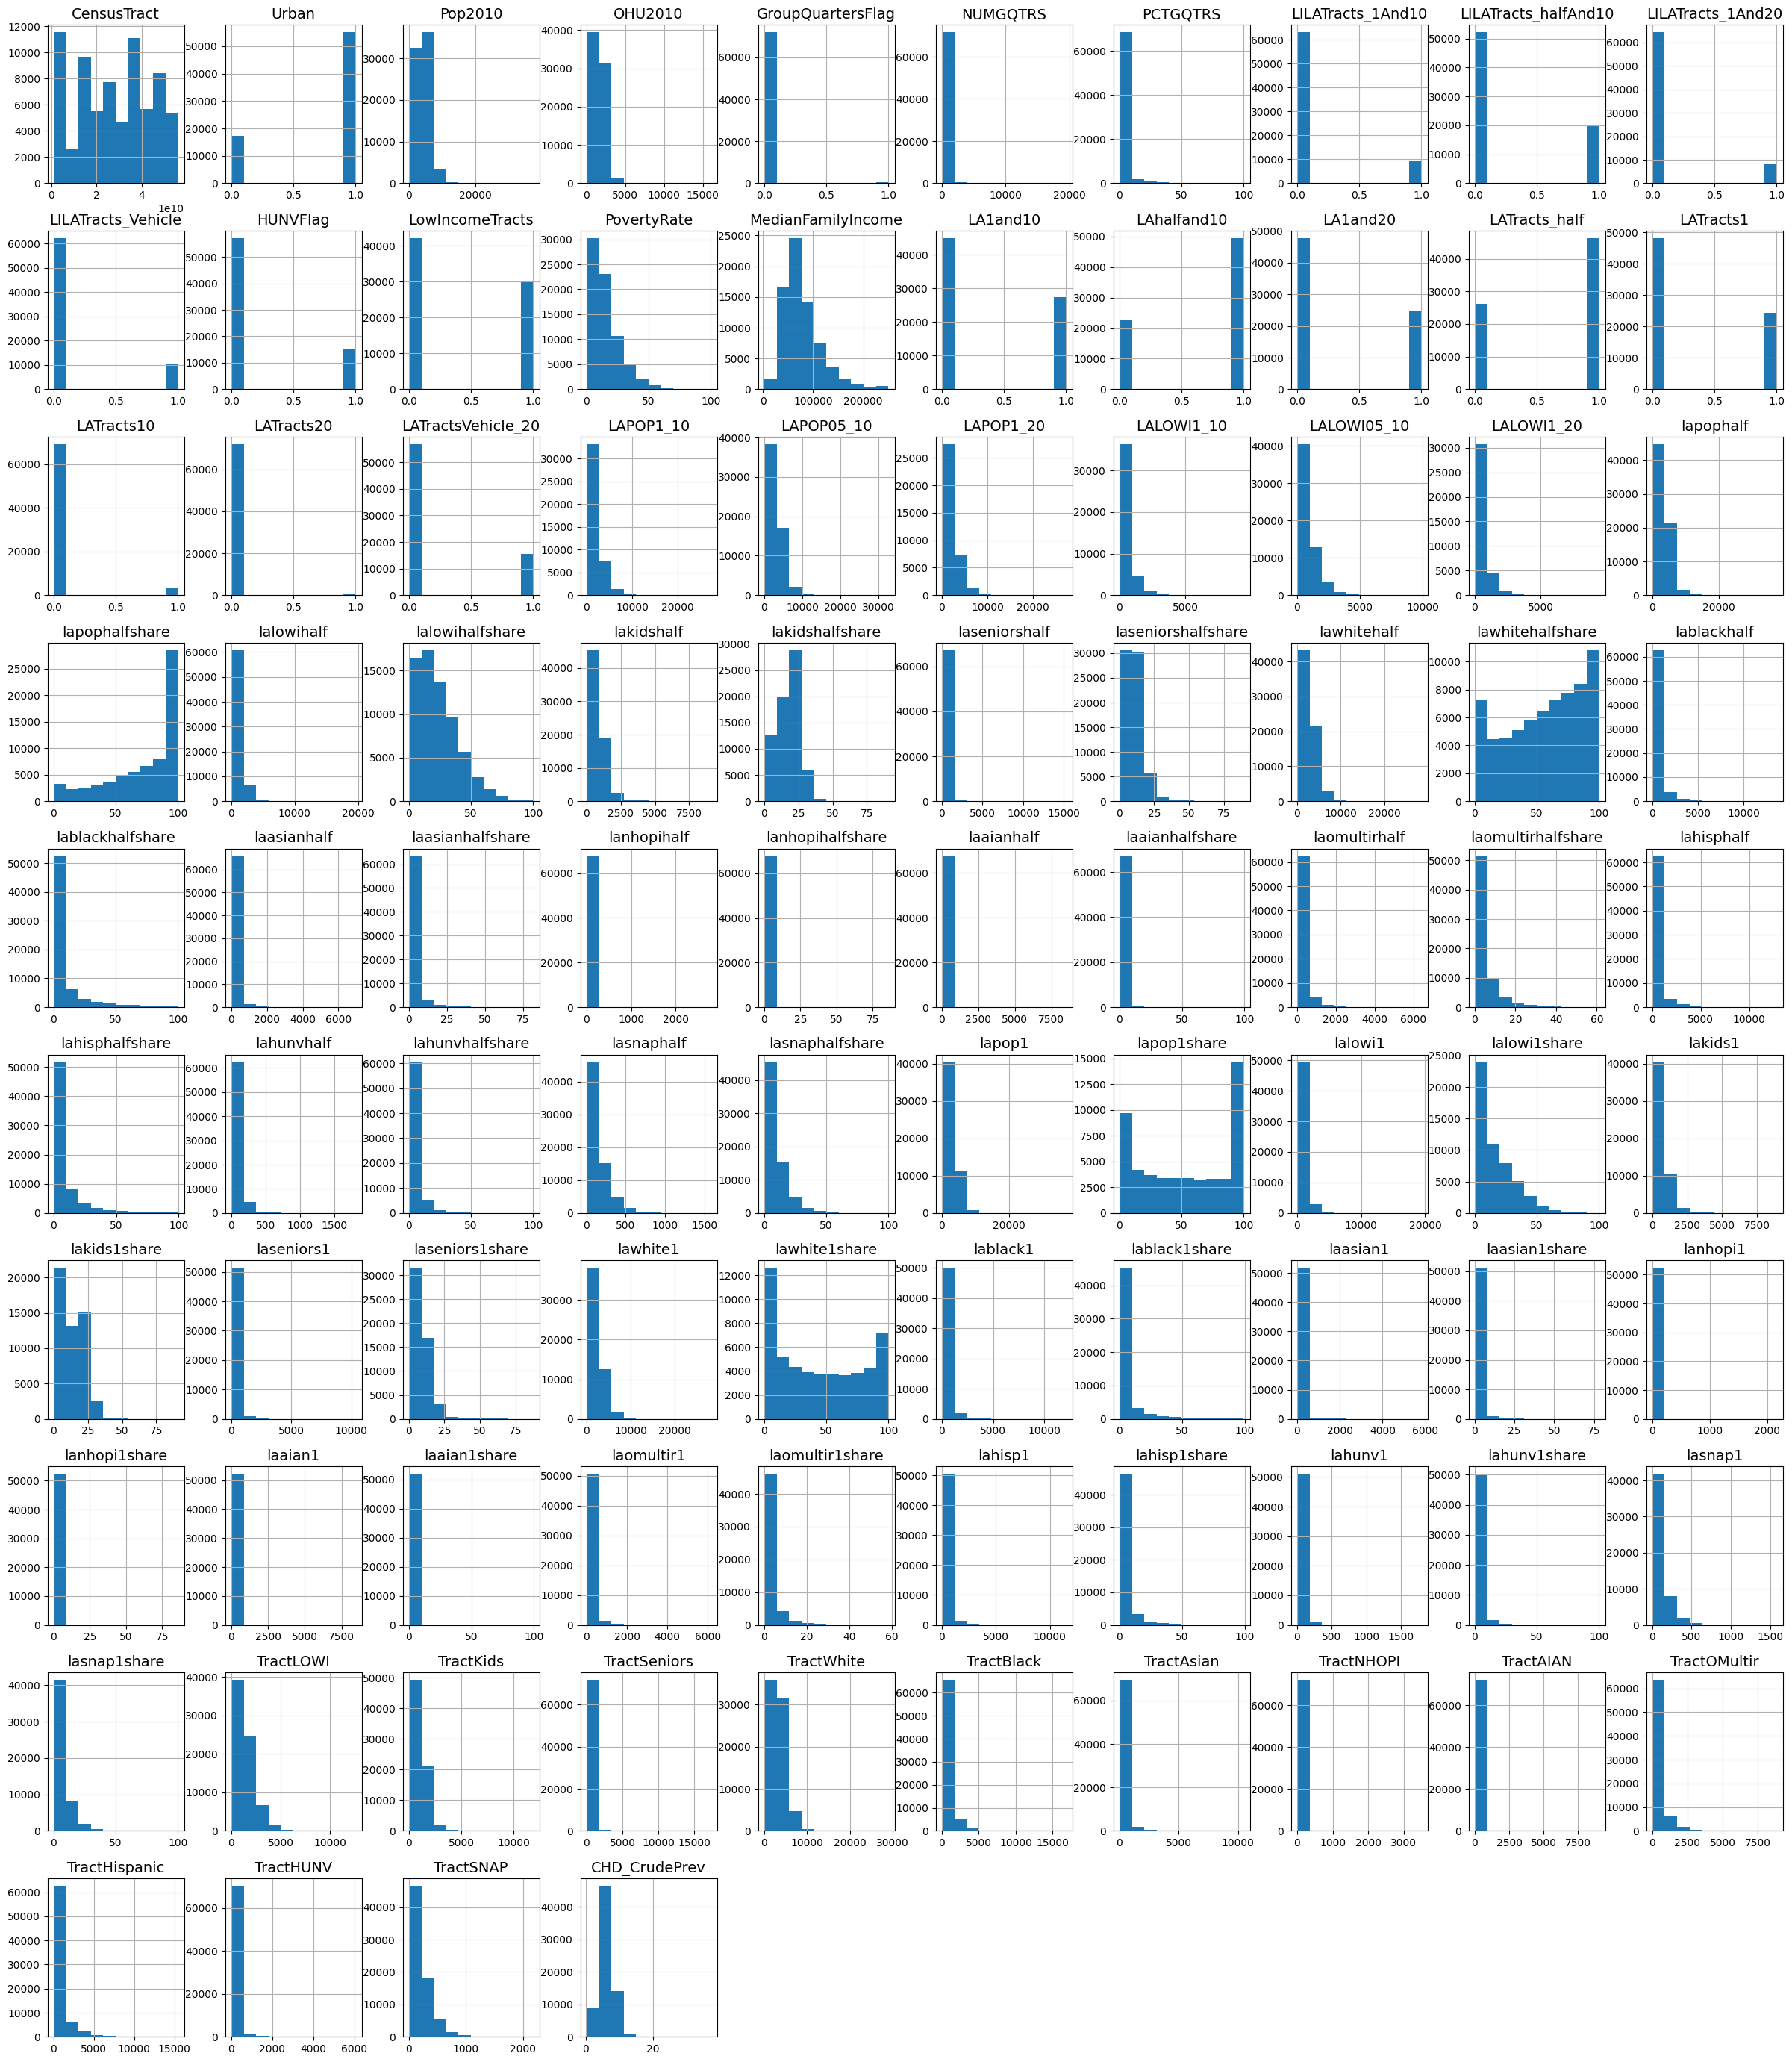

In [26]:
import matplotlib.pyplot as plt

# Define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
joined_df.hist(figsize=(30, 35))
plt.show()

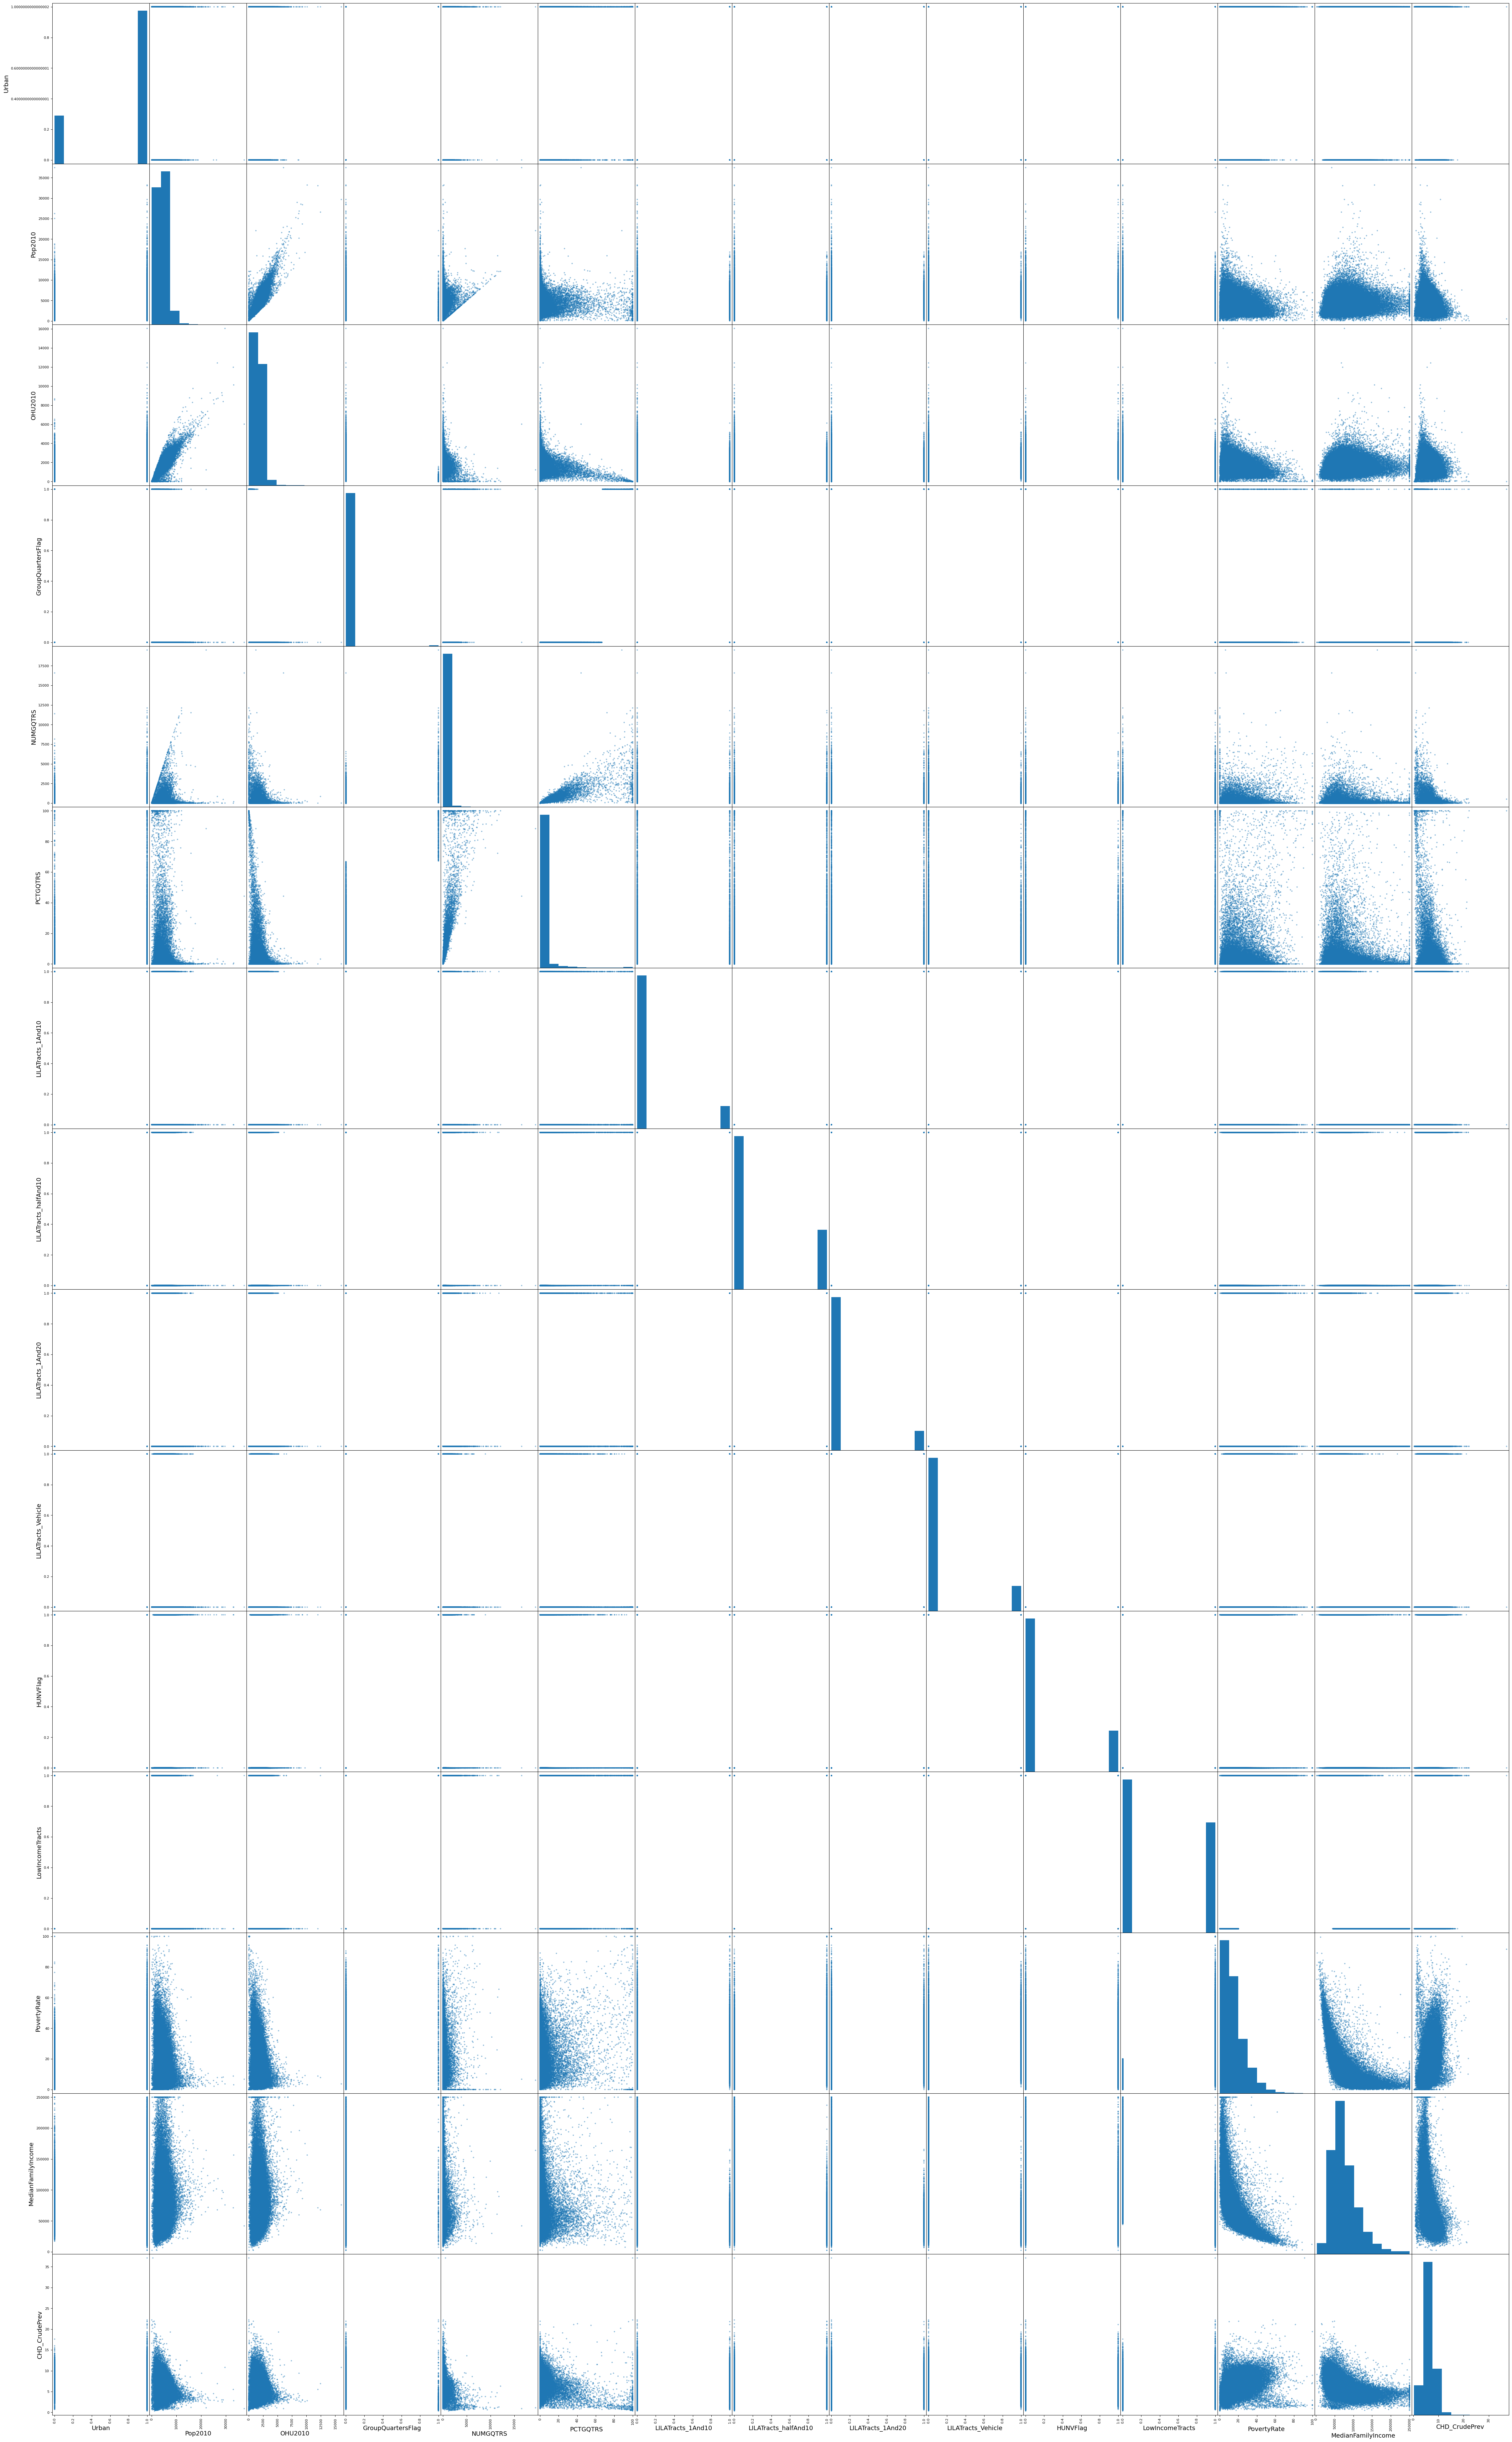

In [27]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 
  
# selecting three numerical features 
scatter_features = ['Urban','Pop2010','OHU2010','GroupQuartersFlag','NUMGQTRS','PCTGQTRS','LILATracts_1And10','LILATracts_halfAnd10',
                    'LILATracts_1And20','LILATracts_Vehicle','HUNVFlag','LowIncomeTracts','PovertyRate','MedianFamilyIncome','CHD_CrudePrev'] 
   
# plotting the scatter matrix 
# with the features 
scatter_matrix(joined_df[scatter_features], figsize = (60,100)) 
plt.show()

<Axes: >

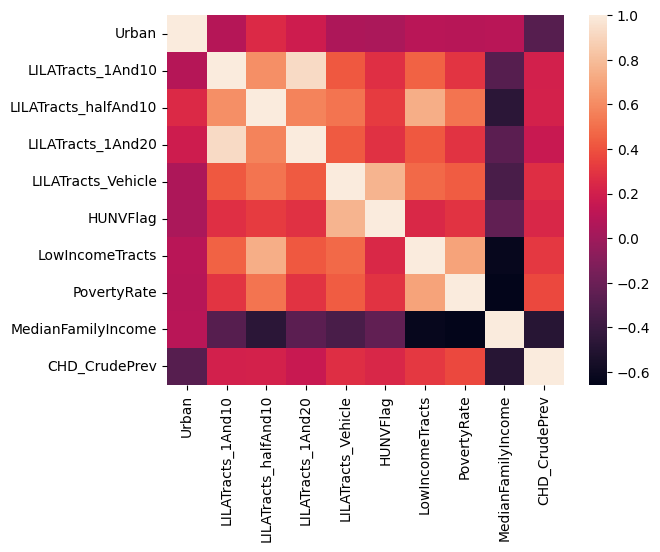

In [28]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = joined_df[['Urban','LILATracts_1And10','LILATracts_halfAnd10','LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag','LowIncomeTracts','PovertyRate','MedianFamilyIncome', 'CHD_CrudePrev']].corr()

# plot the heatmap
sns.heatmap(corr)

<Axes: >

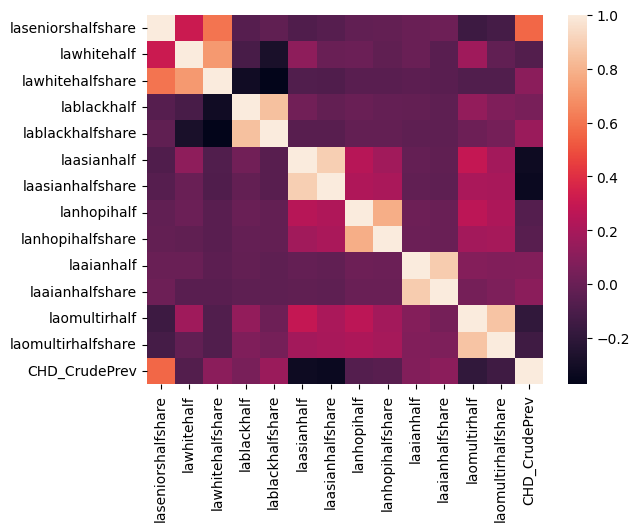

In [29]:
# calculate the correlation matrix on the numeric columns
corr = joined_df[['laseniorshalfshare','lawhitehalf','lawhitehalfshare', 'lablackhalf','lablackhalfshare','laasianhalf',
                  'laasianhalfshare','lanhopihalf','lanhopihalfshare','laaianhalf','laaianhalfshare','laomultirhalf',
                  'laomultirhalfshare', 'CHD_CrudePrev']].corr()

# plot the heatmap
sns.heatmap(corr)

<Axes: >

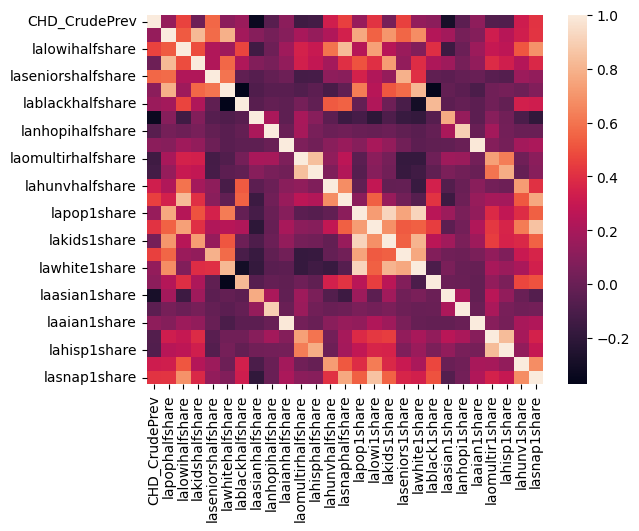

In [30]:
# calculate the correlation matrix on the numeric columns

# Filter columns that contain "share" in their names
share_columns = [col for col in joined_df.columns if 'share' in col]
share_columns_and_target = ['CHD_CrudePrev'] + share_columns

corr = joined_df[share_columns_and_target].corr()

# plot the heatmap
sns.heatmap(corr)

### Define Target

In [31]:
# Create target
target = joined_df['CHD_CrudePrev']

# Drop coronary heart disease from joined_df
joined_features = joined_df.drop('CHD_CrudePrev', axis = 1)

In [32]:
# Train, test split. Training size 80% and test size 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(joined_features, target, test_size =.2, random_state=42)

In [33]:
X_train.head()

CensusTract  Urban  Pop2010  OHU2010  GroupQuartersFlag  NUMGQTRS  \
21617  17031802701      1     6952     2232                  0       6.0   
36416  27163071400      1     7003     2631                  0      10.0   
45368  36061024302      1     7370     2581                  0     166.0   
47576  36119014808      1     3464     1193                  0      18.0   
23928  18003010817      1     4054     1526                  0     136.0   

       PCTGQTRS  LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
21617  0.086306                  0                     0                  0   
36416  0.142796                  0                     0                  0   
45368  2.252374                  0                     0                  0   
47576  0.519630                  0                     0                  0   
23928  3.354711                  0                     0                  0   

       LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  PovertyRate  \
21617                   0         0                0     6.161341   
36416                   0         0                0     2.990986   
45368                   0         0                1    47.563328   
47576                   0         0                0     1.394311   
23928                   0         0                0     4.947669   

       MedianFamilyIncome  LA1and10  LAhalfand10  LA1and20  LATracts_half  \
21617            103750.0         0            1         0              1   
36416             98811.0         1            1         1              1   
45368             25232.0         0            0         0              0   
47576            149643.0         1            1         1              1   
23928             77813.0         0            1         0              1   

       LATracts1  LATracts10  LATracts20  LATractsVehicle_20    LAPOP1_10  \
21617          0           0           0                   0   267.909475   
36416          1           0           0                   0  3693.785116   
45368          0           0           0                   0          NaN   
47576          1           0           0                   0  1793.461776   
23928          0           0           0                   0   419.209271   

        LAPOP05_10    LAPOP1_20  LALOWI1_10  LALOWI05_10  LALOWI1_20  \
21617  3690.384254   267.909475   78.721347   569.997509   78.721347   
36416  6114.356615  3693.785116  241.765000   500.376313  241.765000   
45368          NaN          NaN         NaN          NaN         NaN   
47576  2985.057082  1793.461776  197.455021   361.083146  197.455021   
23928  3302.827737   419.209271  100.533454   795.975444  100.533454   

         lapophalf  lapophalfshare  lalowihalf  lalowihalfshare   lakidshalf  \
21617  3690.384254       53.083778  569.997509         8.199044   852.050534   
36416  6114.356615       87.310533  500.376313         7.145171  1580.162340   
45368          NaN             NaN         NaN              NaN          NaN   
47576  2985.057082       86.173703  361.083146        10.423878   760.410283   
23928  3302.827737       81.470837  795.975444        19.634323   893.828240   

       lakidshalfshare  laseniorshalf  laseniorshalfshare  lawhitehalf  \
21617        12.256193     579.217642            8.331669  3161.078415   
36416        22.564077     773.010239           11.038273  5486.668185   
45368              NaN            NaN                 NaN          NaN   
47576        21.951798     463.205463           13.371982  2632.680791   
23928        22.048057     544.527618           13.431860  2959.147155   

       lawhitehalfshare  lablackhalf  lablackhalfshare  laasianhalf  \
21617         45.470058    30.951760          0.445221   405.499501   
36416         78.347397   192.953002          2.755291   201.659763   
45368               NaN          NaN               NaN          NaN   
47576         76.001178    53.696630          1.550134   200.804214   
23928         72.993

### Standardize

In [34]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on y_train and transform it
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Convert back to a 1D array
y_train_imputed = y_train_imputed.flatten()

Create pipeline for Column transformation

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

    
num_pipeline = make_pipeline(
        SimpleImputer(strategy="mean"), #takes list of name/estimator pairs
        MinMaxScaler() #exposes the same methods as the final transformer (fit_transform) - could be predictor
    )

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder



cat_pipeline = make_pipeline(
    (SimpleImputer(strategy="most_frequent")),
    (OrdinalEncoder())
)

In [37]:
# create list of numerical column names
num_attributes = joined_features.select_dtypes(include=[np.number])
num_attributes = list(num_attributes)
print(num_attributes)

#create list of cat. columns
cat_attributes = joined_features.select_dtypes(include=['object'])
cat_attributes =list(cat_attributes)
print(cat_attributes)

['CensusTract', 'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors

In [38]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
        ('num', num_pipeline, num_attributes),  # Direct numeric data through num_pipeline
        ('cat', cat_pipeline, cat_attributes)   # Direct categorical data through cat_pipeline
    ])



In [39]:
# Apply the ColumnTransformer to X_train dataset
X_train_prepared = preprocessing.fit_transform(X_train)

In [40]:
X_train_prepared

array([[2.91230859e-01, 1.00000000e+00, 1.84404749e-01, ...,
        5.77653078e-03, 9.97701149e-02, 6.01000000e+02],
       [4.75285385e-01, 1.00000000e+00, 1.85768531e-01, ...,
        1.50189800e-02, 2.39080460e-02, 1.37900000e+03],
       [6.36934291e-01, 1.00000000e+00, 1.95582415e-01, ...,
        3.75639544e-01, 5.78850575e-01, 1.83300000e+03],
       ...,
       [7.44885507e-01, 1.00000000e+00, 1.13354369e-01, ...,
        3.71348407e-02, 9.42528736e-02, 2.21400000e+03],
       [1.74379907e-03, 1.00000000e+00, 9.60263130e-02, ...,
        1.53490675e-02, 1.42068966e-01, 4.80000000e+01],
       [2.01144450e-01, 1.00000000e+00, 8.79773238e-02, ...,
        2.80574352e-03, 1.65517241e-02, 3.49000000e+02]])

In [41]:
#Transform test data
X_test_prepared = preprocessing.fit_transform(X_test)


### Feature Selection - Reduce dimensionality

### Prepare models

### Random Forest
Use RandomForestRegressor to find the most important features. Randomized GridSearch is used to reduce computation usage

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid_rf = {'max_depth' : [2,3,4],
                 'n_estimators' : [25,50,100],
                 'min_samples_split' : [2,3,4]}

#Instantiate an object of the GridSearchCV class called grid_search_cv
rand_search_cv_rf = RandomizedSearchCV(RandomForestRegressor(random_state = 42), param_grid_rf, 
                                       verbose=1, cv=3)


# fit the model
rand_search_cv_rf.fit(X_train_prepared, y_train_imputed)

#Print the best parameters identified by the grid search using the best_params_ attribute of the GridSearchCV object

print("The best parameters are: ", rand_search_cv_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 4}


In [43]:
# Create variable for best parameters
best_param_rf = rand_search_cv_rf.best_params_

In [44]:
# Create optimal RandomForestRegression

from sklearn.ensemble import RandomForestRegressor

rand_for = RandomForestRegressor(**best_param_rf, random_state=42)
rand_for.fit(X_train_prepared, y_train_imputed)


RandomForestRegressor(max_depth=4, min_samples_split=3, random_state=42)

In [45]:
# Get feature importances from the trained model
rf_importances = rand_for.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

                 Feature  Importance
86            TractAsian    0.449375
14    MedianFamilyIncome    0.207924
36    laseniorshalfshare    0.184296
83          TractSeniors    0.144655
13           PovertyRate    0.009102
92             TractSNAP    0.003344
34       lakidshalfshare    0.001048
84            TractWhite    0.000256
59               lakids1    0.000000
66         lablack1share    0.000000
65              lablack1    0.000000
64         lawhite1share    0.000000
63              lawhite1    0.000000
62       laseniors1share    0.000000
61            laseniors1    0.000000
60          lakids1share    0.000000
0            CensusTract    0.000000
58          lalowi1share    0.000000
68         laasian1share    0.000000
57               lalowi1    0.000000
56           lapop1share    0.000000
55                lapop1    0.000000
54       lasnaphalfshare    0.000000
53            lasnaphalf    0.000000
52       lahunvhalfshare    0.000000
51            lahunvhalf    0.000000
6

### TractAsian is the most important feature

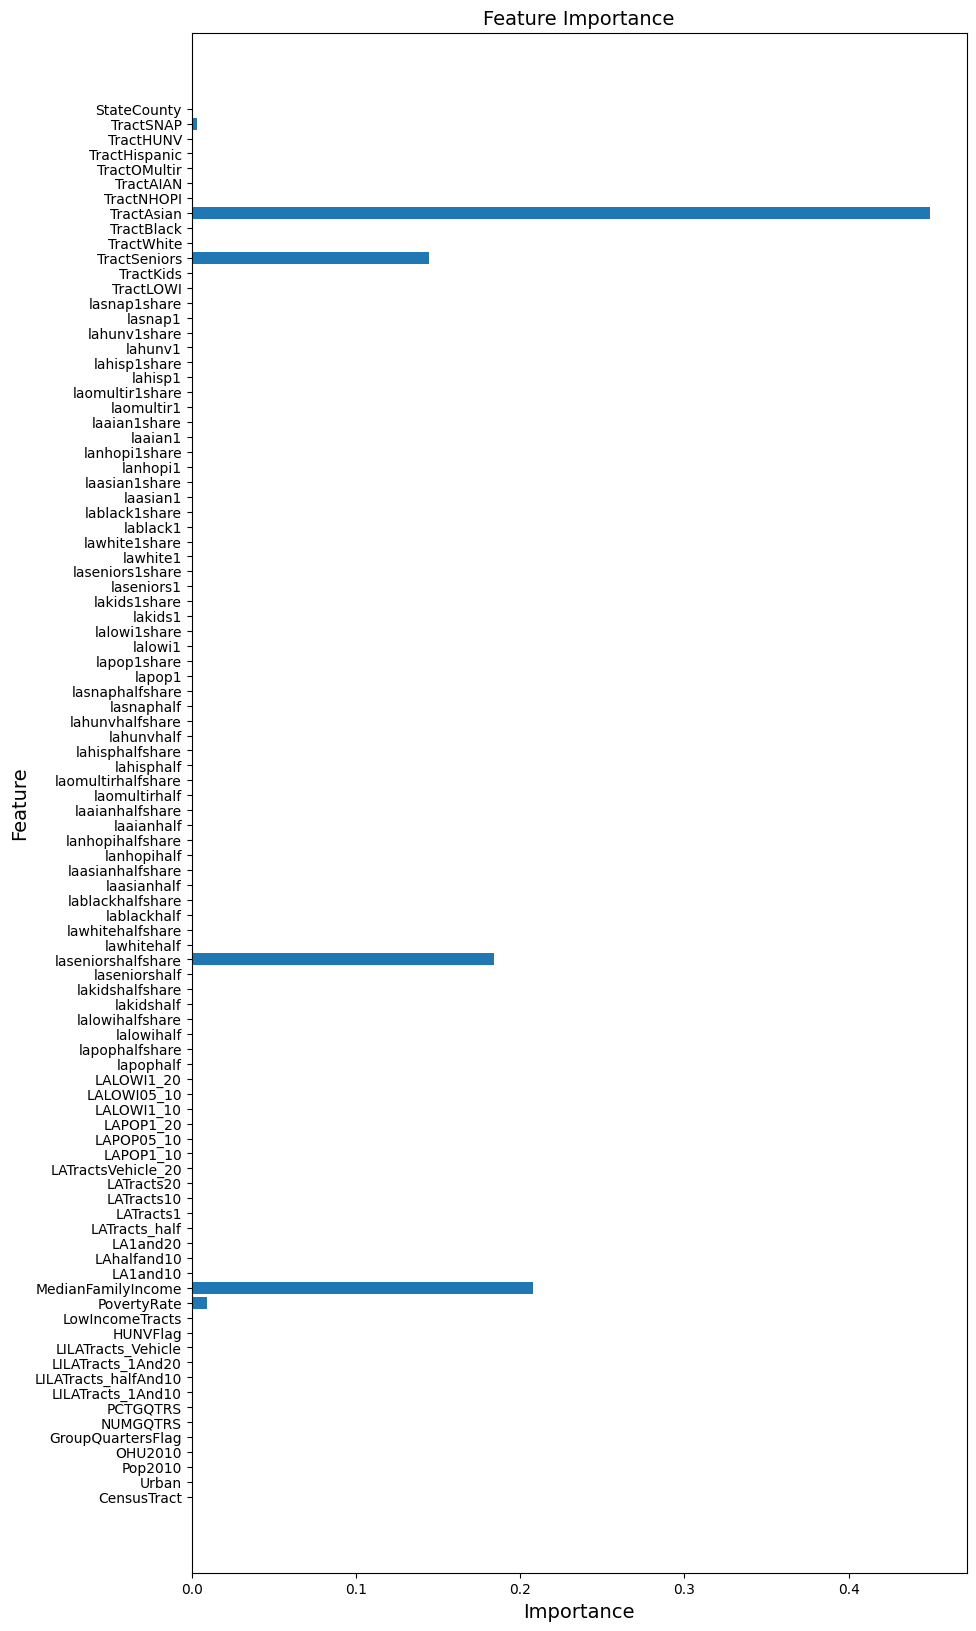

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
plt.barh(X_train.columns, rf_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Identify and drop features with importance equal to zero

In [47]:
# Identify features with importance equal to zero
zero_importance_features =[col for col, Importance in zip(X_train.columns, rf_importances) if Importance == 0.0]

# Drop features with zero importance from both training and testing sets
X_train_reduced = X_train.drop(columns=zero_importance_features)


In [48]:
X_test_reduced = X_test.drop(columns=zero_importance_features)

In [49]:
X_train_reduced.head()

PovertyRate  MedianFamilyIncome  lakidshalfshare  laseniorshalfshare  \
21617     6.161341            103750.0        12.256193            8.331669   
36416     2.990986             98811.0        22.564077           11.038273   
45368    47.563328             25232.0              NaN                 NaN   
47576     1.394311            149643.0        21.951798           13.371982   
23928     4.947669             77813.0        22.048057           13.431860   

       TractSeniors  TractWhite  TractAsian  TractSNAP  
21617         848.0      5077.0       828.0      217.0  
36416        1061.0      6328.0       205.0       52.0  
45368         847.0       874.0       144.0     1259.0  
47576         597.0      3062.0       223.0       34.0  
23928         771.0      3618.0        41.0       87.0

Transform training data that has reduced features

### Re-split data

In [50]:
# create list of numerical column names
num_attributes = X_train_reduced.select_dtypes(include=[np.number])
num_attributes = list(num_attributes)
print(num_attributes)



['PovertyRate', 'MedianFamilyIncome', 'lakidshalfshare', 'laseniorshalfshare', 'TractSeniors', 'TractWhite', 'TractAsian', 'TractSNAP']


In [51]:
from sklearn.compose import ColumnTransformer

preprocessing_2 = ColumnTransformer([
        ('num', num_pipeline, num_attributes)  # Direct numeric data through num_pipeline
    ])

In [52]:
# Step 4: Apply the ColumnTransformer to X_train dataset
X_train_prepared_new = preprocessing_2.fit_transform(X_train_reduced)

#### Logistic Regression 

In [53]:
y_train_imputed

array([4.8, 5. , 7.9, ..., 5.6, 6.6, 4.9])

In [54]:
#Create an instance of Scikit-Learn's LinearRegression() class and name this object ols_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



In [55]:
#Train your ols_model by fitting it with the X_train and y_train data.
lr_model=lr.fit(X_train_prepared_new, y_train_imputed)

In [56]:
from sklearn.model_selection import cross_val_score

# cross validation
lr_model_rmse = -cross_val_score(lr_model, X_train_prepared_new, y_train_imputed,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(lr_model_rmse).describe()



count    10.000000
mean      1.232492
std       0.030860
min       1.194741
25%       1.213874
50%       1.225674
75%       1.237910
max       1.298161
dtype: float64

### Ridge model

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid_ridge = {'alpha' : [.1,.25,.5,1.0],
                 'max_iter' : [100,500,1000,1250,1500]
                 }

#Instantiate an object of the GridSearchCV class called grid_search_cv
grid_search_cv_ridge = GridSearchCV(Ridge(random_state = 42), param_grid_ridge, verbose=1, cv=3)


# fit the model
grid_search_cv_ridge.fit(X_train_prepared_new, y_train_imputed)

#Print the best parameters identified by the grid search using the best_params_ attribute of the GridSearchCV object


print("The best parameters are: ", grid_search_cv_ridge.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
The best parameters are:  {'alpha': 0.25, 'max_iter': 100}


In [58]:
# create best parameter model
best_params = grid_search_cv_ridge.best_params_

In [59]:
# Create a new model instance with the best parameters
best_ridge = Ridge(**best_params, random_state=42)

# Train the best model on the entire training data
best_ridge.fit(X_train_prepared_new, y_train_imputed)



Ridge(alpha=0.25, max_iter=100, random_state=42)

In [60]:
# cross validation
ridge_model = -cross_val_score(best_ridge, X_train_prepared_new, y_train_imputed,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(ridge_model).describe()

count    10.000000
mean      1.232461
std       0.029448
min       1.194985
25%       1.214489
50%       1.226142
75%       1.238780
max       1.292826
dtype: float64

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid_rf = {'max_depth' : [2,3,4],
                 'n_estimators' : [25,50,100],
                 'min_samples_split' : [2,3,4]}

#Instantiate an object of the GridSearchCV class called grid_search_cv
rand_search_cv_rf = RandomizedSearchCV(RandomForestRegressor(random_state = 42), param_grid_rf, 
                                       verbose=1, cv=3)




In [62]:
# fit the model
rand_search_cv_rf.fit(X_train_prepared_new, y_train_imputed)

#Print the best parameters identified by the grid search using the best_params_ attribute of the GridSearchCV object

print("The best parameters are: ", rand_search_cv_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 4}


In [63]:
# create best parameter model
best_params_rf = rand_search_cv_rf.best_params_

In [64]:
rand_for = RandomForestRegressor(**best_params_rf, random_state=42)
rand_for.fit(X_train_prepared_new, y_train_imputed)

RandomForestRegressor(max_depth=4, min_samples_split=3, n_estimators=50,
                      random_state=42)

In [65]:
# cross validation
rf_model = -cross_val_score(rand_for, X_train_prepared_new, y_train_imputed,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(rf_model).describe()

count    10.000000
mean      1.250608
std       0.023902
min       1.214628
25%       1.239815
50%       1.245682
75%       1.266130
max       1.294534
dtype: float64

### Neural Network


In [66]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

model_nn.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=0.075))

In [67]:
model_nn.fit(X_train_prepared_new, y_train_imputed, epochs=50, verbose=2)

Epoch 1/50

1809/1809 - 4s - loss: 2.0514 - 4s/epoch - 2ms/step
Epoch 2/50
1809/1809 - 3s - loss: 1.4541 - 3s/epoch - 2ms/step
Epoch 3/50
1809/1809 - 4s - loss: 1.3786 - 4s/epoch - 2ms/step
Epoch 4/50
1809/1809 - 3s - loss: 1.2947 - 3s/epoch - 2ms/step
Epoch 5/50
1809/1809 - 3s - loss: 1.2929 - 3s/epoch - 2ms/step
Epoch 6/50
1809/1809 - 3s - loss: 1.2452 - 3s/epoch - 2ms/step
Epoch 7/50
1809/1809 - 5s - loss: 1.1822 - 5s/epoch - 3ms/step
Epoch 8/50
1809/1809 - 4s - loss: 1.1751 - 4s/epoch - 2ms/step
Epoch 9/50
1809/1809 - 3s - loss: 1.1417 - 3s/epoch - 2ms/step
Epoch 10/50
1809/1809 - 3s - loss: 1.1149 - 3s/epoch - 2ms/step
Epoch 11/50
1809/1809 - 3s - loss: 1.0831 - 3s/epoch - 2ms/step
Epoch 12/50
1809/1809 - 4s - loss: 1.1348 - 4s/epoch - 2ms/step
Epoch 13/50
1809/1809 - 3s - loss: 1.1273 - 3s/epoch - 2ms/step
Epoch 14/50
1809/1809 - 3s - loss: 1.2081 - 3s/epoch - 2ms/step
Epoch 15/50
1809/1809 - 3s - loss: 1.0661 - 3s/epoch - 2ms/step
Epoch 16/50
1809/1809 - 3s - loss: 1.1973 - 3s/e

In [68]:
# transform test set features -- DO NOT USE fit_transform
X_test_prepared = preprocessing_2.transform(X_test_reduced)


In [69]:
y_pred = model_nn.predict(X_test_prepared)

453/453 [==============================] - 1s 2ms/step


In [70]:
# Fit the imputer on y_train and transform it
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))

# Convert back to a 1D array
y_test_imputed = y_test_imputed.flatten()

In [71]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test_imputed, y_pred),4)

print("Generalization Error (MSE):", mse)

Generalization Error (MSE): 0.9347


In [72]:
from math import sqrt
print("RMSE:", sqrt(mse))

RMSE: 0.966798841538404


The RMSE for the neural network is lowere than tha random forest, linear and ridge models.

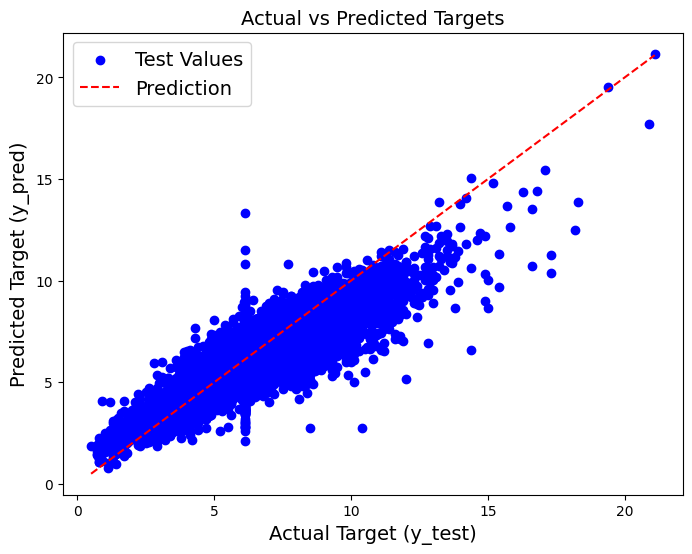

In [73]:
# Create a scatter plot of test values vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_imputed, y_pred, color='blue', label='Test Values')
plt.plot([y_test_imputed.min(), y_test_imputed.max()], [y_test_imputed.min(), y_test_imputed.max()], color='red', linestyle='--', label='Prediction')
plt.xlabel('Actual Target (y_test)')
plt.ylabel('Predicted Target (y_pred)')
plt.title('Actual vs Predicted Targets')
plt.legend()
plt.show()

## Export Model to Pickle File

Train a model and save the trained model to pickle file called final_model.pkl

In [74]:
import joblib


In [75]:
joblib.dump(model_nn, 'finalModel.pkl', compress = 1)

['finalModel.pkl']

## Load Model and Predict

Test pickle file

In [76]:
# open file
file = open("finalModel.pkl", "rb")

In [77]:
# Create Data Frame
data = pd.DataFrame({'PovertyRate': [5.0], 'MedianFamilyIncome': [100000.0],
     'lakidshalfshare': [20.0], 'laseniorshalfshare': [5.0],
     'TractSeniors': [1.0],'TractWhite': [1.0],'TractAsian': [50.0],'TractSNAP': [1.0]})
data.head()

PovertyRate  MedianFamilyIncome  lakidshalfshare  laseniorshalfshare  \
0          5.0            100000.0             20.0                 5.0   

   TractSeniors  TractWhite  TractAsian  TractSNAP  
0           1.0         1.0        50.0        1.0

In [78]:
#scaler object
scaler = joblib.dump(preprocessing_2, "scaler.pkl")


In [79]:
data_scaled = preprocessing_2.transform(data)

In [80]:



# load trained model
trained_model = joblib.load(file)

# predict
prediction = trained_model.predict(data_scaled)
prediction



1/1 [==============================] - 0s 123ms/step


array([[3.088443]], dtype=float32)

In [81]:
print("The model prediction states that", prediction[0], "% of people will have coronary heart disease.")

The model prediction states that [3.088443] % of people will have coronary heart disease.
